In [1]:
# Imports
import torch
import torch_cluster
from torch_geometric.nn import Node2Vec
from torch_geometric.datasets import Planetoid
from torchsummary import summary
from tqdm.notebook import tqdm

import ogb
# print(ogb.__version__)

import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

import time
import json
import copy
import random
import os.path as osp
from pprint import pprint

import importlib
import sys
sys.path.append('./modules')

import training
importlib.reload(training)
import graph_vis
importlib.reload(graph_vis)
import graph_creation
importlib.reload(graph_creation)
import utils
importlib.reload(utils)

from ogb.nodeproppred import Evaluator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
device = utils.set_seeds_and_device() 
dataset_cora,data_cora = training.load_dataset('Cora', "../training_data/datasets")

Using device: cpu
Random seed set to: 42


In [15]:
parameter_dicts = training.create_parameters_dict()

p_values: [1, 2]
q_values: [1, 2]


In [16]:
parameter_dict = {
            "embedding_dim": 128,
            "walk_length": 80,
            "context_size": 10,
            "walks_per_node": 10,
            "num_negative_samples": 1,
            "sparse": True,
            "q":2,
            "p":1
        }
# d = 128, r = 10, l = 80, k = 10

Model initialization parameters provided as dictionary.
Model initialized
Starting training for 40 epochs...


Epoch: 001, Loss: 7.6173, Acc: 0.1690, Duration: 91.05s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.1690


Epoch: 002, Loss: 5.3159, Acc: 0.2010, Duration: 81.63s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.2010


Epoch: 003, Loss: 4.0855, Acc: 0.2420, Duration: 79.38s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.2420


Epoch: 004, Loss: 3.1978, Acc: 0.2840, Duration: 98.29s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.2840


Epoch: 005, Loss: 2.5521, Acc: 0.3270, Duration: 168.62s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.3270


Epoch: 006, Loss: 2.0937, Acc: 0.3690, Duration: 170.20s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.3690


Epoch: 007, Loss: 1.7574, Acc: 0.3940, Duration: 144.79s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.3940


Epoch: 008, Loss: 1.5140, Acc: 0.4400, Duration: 70.37s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.4400


Epoch: 009, Loss: 1.3384, Acc: 0.4830, Duration: 77.32s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.4830


Epoch: 010, Loss: 1.2124, Acc: 0.5170, Duration: 87.77s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.5170


Epoch: 011, Loss: 1.1219, Acc: 0.5460, Duration: 110.57s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.5460


Epoch: 012, Loss: 1.0560, Acc: 0.5700, Duration: 129.64s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.5700


Epoch: 013, Loss: 1.0071, Acc: 0.5880, Duration: 131.42s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.5880


Epoch: 014, Loss: 0.9700, Acc: 0.6060, Duration: 115.23s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6060


Epoch: 015, Loss: 0.9426, Acc: 0.6260, Duration: 120.49s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6260


Epoch: 016, Loss: 0.9212, Acc: 0.6410, Duration: 130.51s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6410


Epoch: 017, Loss: 0.9033, Acc: 0.6440, Duration: 134.13s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6440


Epoch: 018, Loss: 0.8893, Acc: 0.6520, Duration: 119.62s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6520


Epoch: 019, Loss: 0.8782, Acc: 0.6560, Duration: 110.09s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6560


Epoch: 020, Loss: 0.8686, Acc: 0.6730, Duration: 118.37s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6730


Epoch: 021, Loss: 0.8608, Acc: 0.6760, Duration: 112.31s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6760


Epoch: 022, Loss: 0.8547, Acc: 0.6780, Duration: 116.10s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6780


Epoch: 023, Loss: 0.8482, Acc: 0.6750, Duration: 97.02s


Epoch: 024, Loss: 0.8438, Acc: 0.6760, Duration: 89.57s


Epoch: 025, Loss: 0.8390, Acc: 0.6810, Duration: 90.02s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6810


Epoch: 026, Loss: 0.8354, Acc: 0.6790, Duration: 81.73s


Epoch: 027, Loss: 0.8319, Acc: 0.6830, Duration: 106.52s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6830


Epoch: 028, Loss: 0.8291, Acc: 0.6820, Duration: 104.87s


Epoch: 029, Loss: 0.8263, Acc: 0.6860, Duration: 78.51s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6860


Epoch: 030, Loss: 0.8241, Acc: 0.6880, Duration: 83.24s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6880


Epoch: 031, Loss: 0.8214, Acc: 0.6990, Duration: 86.59s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.6990


Epoch: 032, Loss: 0.8202, Acc: 0.6960, Duration: 80.83s


Epoch: 033, Loss: 0.8183, Acc: 0.7000, Duration: 94.34s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.7000


Epoch: 034, Loss: 0.8168, Acc: 0.7090, Duration: 128.29s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.7090


Epoch: 035, Loss: 0.8151, Acc: 0.7060, Duration: 80.07s


Epoch: 036, Loss: 0.8141, Acc: 0.7060, Duration: 74.66s


Epoch: 037, Loss: 0.8125, Acc: 0.7050, Duration: 108.08s


Epoch: 038, Loss: 0.8117, Acc: 0.7060, Duration: 174.92s


Epoch: 039, Loss: 0.8110, Acc: 0.7120, Duration: 183.49s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.7120


Epoch: 040, Loss: 0.8099, Acc: 0.7160, Duration: 181.80s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.7160

Training finished.
Total elapsed time: 4442.83 seconds
Best test accuracy: 0.7160
Best model state saved to '../training_data/models/node2vec_'


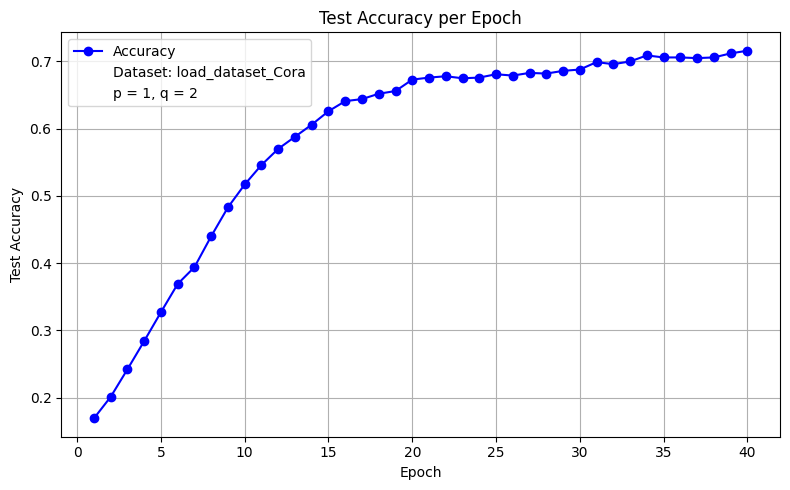

In [17]:
model = training.model_init(parameter_dict,data_cora)

loader, optimizer = training.set_loader_and_optimizer(model)
num_training_epochs = 40 # Or 201, etc.

best_state, training_history = training.model_training_n2v(
    model,
    parameter_dict,
    data_cora,
    loader,
    optimizer,
    num_training_epochs,
    device,
    model_save_path='../training_data/models/node2vec_' # Example save path
)


In [18]:
model.eval()
with torch.no_grad():
    embeddings = model.embedding.weight.cpu().numpy()

embeddings

array([[ 0.09186299, -0.05668784,  0.12476937, ..., -0.02945427,
        -0.11075887,  0.05544662],
       [ 0.14085962, -0.06119557,  0.29751813, ..., -0.3571702 ,
         0.32280535, -0.03163625],
       [ 0.20880184, -0.08795394,  0.04427352, ..., -0.43054834,
         0.22250132,  0.04050569],
       ...,
       [-0.1939645 , -0.11990315,  0.22887021, ...,  0.05690839,
        -0.09410919, -0.25866625],
       [ 0.12041108,  0.20969765, -0.22255325, ..., -0.04653875,
        -0.28917044,  0.1641828 ],
       [ 0.14230902,  0.19494015, -0.27692184, ..., -0.00600604,
        -0.35445604,  0.15571712]], shape=(2708, 128), dtype=float32)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# X = embeddings from Node2Vec
X = embeddings
y = data_cora.y.cpu().numpy()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(max_iter=500)
}

results = {}

for name, model in models.items():
    try:
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Test accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred))
        results[name] = acc
    except Exception as e:
        print(f"{name} failed: {e}")

# Summary table
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Test Accuracy"])
print("\nModel Comparison Summary:")
print(results_df.sort_values(by="Test Accuracy", ascending=False).to_string(index=False))


Training Logistic Regression...
Logistic Regression Test accuracy: 0.7952
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        70
           1       0.80      0.86      0.83        43
           2       0.94      0.90      0.92        84
           3       0.78      0.77      0.77       164
           4       0.82      0.80      0.81        85
           5       0.77      0.77      0.77        60
           6       0.80      0.78      0.79        36

    accuracy                           0.80       542
   macro avg       0.80      0.80      0.80       542
weighted avg       0.80      0.80      0.80       542


Training SVM...
SVM Test accuracy: 0.8339
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        70
           1       0.95      0.81      0.88        43
           2       0.95      0.93      0.94        84
           3       0.76      0.90      0.83       164
           4  